# Iris Species Classification 

### Group 126: Manya Jain, Zhuohang Lyu, Chang Sun

# Introduction

Iris is a genus of flowering plants with 310 recognised species with vivid flowers. Iris is both the common name and the scientific name for all species of Iris, as well as some species from other closely related genera.

## Question:
We shall answer the following question: Can we distinguish among the species of the iris plant?

## Dataset Used:

The dataset that we will be using for the analysis is a multivariable dataset, “Iris flower dataset”, also known as “Fisher’s Iris data set”. The Iris dataset, which is also available on the UCI Machine Learning Repository, was utilised in R.A. Fisher's 1936 landmark paper ‘The Use of Multiple Measurements in Taxonomic Problems’.

It contains information about each flower's characteristics about three iris species (Iris setosa, Iris virginica and Iris versicolor)  with 50 samples each. 

In [1]:
library(readxl)
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
iris<- read.csv("data/Iris.csv")
iris<- mutate(iris, Species = as.factor(Species))|>
select(!Id)
iris

SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5.0,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa


In [3]:
iris_split <- initial_split(iris, prop= 0.8, strata= Species)
iris_train <- training(iris_split)
iris_test <- testing(iris_split)

In [4]:
set.seed(200)

iris_recipe <- recipe(Species ~., data = iris_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

knn_spec<-nearest_neighbor(weight_func = "rectangular", neighbors = tune())|>
set_engine("kknn")|>
set_mode("classification")

iris_vfold<-vfold_cv(iris_train,v=5,strata=Species)

gridvals<-tibble(neighbors = seq(1,91))

iris_results<-workflow()|>
add_recipe(iris_recipe)|>
add_model(knn_spec)|>
tune_grid(resamples = iris_vfold, grid=gridvals)|>
collect_metrics()
iris_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.9500000,5,0.024295633,Preprocessor1_Model01
1,roc_auc,hand_till,0.9625000,5,0.018221725,Preprocessor1_Model01
2,accuracy,multiclass,0.9500000,5,0.024295633,Preprocessor1_Model02
2,roc_auc,hand_till,0.9700521,5,0.010705627,Preprocessor1_Model02
3,accuracy,multiclass,0.9500000,5,0.020412415,Preprocessor1_Model03
3,roc_auc,hand_till,0.9890625,5,0.008454522,Preprocessor1_Model03
4,accuracy,multiclass,0.9500000,5,0.020412415,Preprocessor1_Model04
4,roc_auc,hand_till,0.9885417,5,0.007663510,Preprocessor1_Model04
5,accuracy,multiclass,0.9333333,5,0.016666667,Preprocessor1_Model05


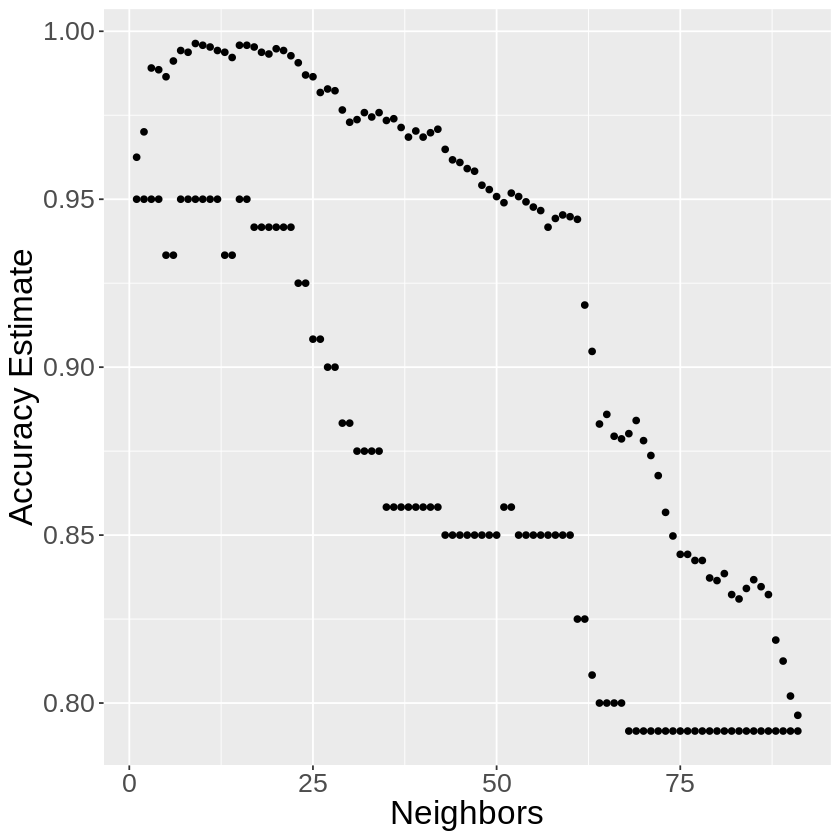

In [5]:
iris_val_plot<-iris_results|>
ggplot(aes(x = neighbors,y=mean))+
geom_point()+
labs(x="Neighbors",y="Accuracy Estimate")+
theme(text = element_text(size = 20))
iris_val_plot

In [6]:
knn_best_spec<-nearest_neighbor(weight_func = "rectangular", neighbors = 25)|>
set_engine("kknn")|>
set_mode("classification")

iris_fit<-workflow()|>
add_recipe(iris_recipe)|>
add_model(knn_best_spec)|>
fit(data=iris_train)

In [7]:
iris_predictions<- predict(iris_fit,iris_test)|>
bind_cols(iris_test)
iris_predictions

.pred_class,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Iris-setosa,4.9,3.0,1.4,0.2,Iris-setosa
Iris-setosa,4.6,3.1,1.5,0.2,Iris-setosa
Iris-setosa,5.0,3.4,1.5,0.2,Iris-setosa
Iris-setosa,5.1,3.7,1.5,0.4,Iris-setosa
Iris-setosa,5.1,3.3,1.7,0.5,Iris-setosa
Iris-setosa,4.8,3.4,1.9,0.2,Iris-setosa
Iris-setosa,5.2,3.4,1.4,0.2,Iris-setosa
Iris-setosa,5.4,3.4,1.5,0.4,Iris-setosa
Iris-setosa,5.2,4.1,1.5,0.1,Iris-setosa


In [8]:
iris_accuracy<-iris_predictions|>
metrics(truth= Species,estimate=.pred_class)|>
select(.metric,.estimate)|>
head(1)
iris_accuracy

.metric,.estimate
<chr>,<dbl>
accuracy,0.9666667


In [9]:
iris_cm<-iris_predictions|>
conf_mat(truth = Species,estimate=.pred_class)
iris_cm

                 Truth
Prediction        Iris-setosa Iris-versicolor Iris-virginica
  Iris-setosa              10               0              0
  Iris-versicolor           0              10              1
  Iris-virginica            0               0              9

# Methods

We intend to perform classification by stratifying the dataset by species.

 These are the columns in this dataset: 

* Id
* SepalLengthCm 
* SepalWidthCm 
* PetalLengthCm 
* PetalWidthCm 
* Species

The predictors we will be using are: SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm. 
We will visualize using scatter plot: In order to investigate the relationship between individual predictors based on iris species, scatterplot may be a better choice because the scatterplot is a type of data display that demonstrates the connection between two numerical variables.

# Expected outcomes and significance:

In this project we expect to be able to identify the species of iris by the shape of its sepals and petals (length and width). Based on this data, more species of iris can be identified, which may facilitate the selecting and breeding of better varieties.